In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import seaborn

In [28]:
# matplotlib 한글 표시 설정
import matplotlib.font_manager as fm

# matplotlib의 글꼴 관리자에 특정 글꼴 추가
fe = fm.FontEntry(
    fname= r'font/NanumGothic.ttf',
    name= 'NanumGothic'
)
fm.fontManager.ttflist.insert(0, fe)

# pyplot에 matplotlib의 글꼴 관리자에 등록된 글꼴 적용
plt.rcParams.update({'font.family':'NanumGothic', 'font.size':14})
# pyplot에서 `-`를 문자로 취급하도록 설정
plt.rcParams['axes.unicode_minus'] = False

In [3]:
iris = seaborn.load_dataset('iris') # 붓꽃 데이터
titanic = seaborn.load_dataset('titanic') # 타이타닉 데엍
tips = seaborn.load_dataset('tips') # 팁 데이터
flights = seaborn.load_dataset('flights') # 여객기 데이터

### seaborn을 활용한 1차원 분포 플롯
seaborn 패키지에서 제공해주는 여러가지 메서드를 활용하여 간단하게 1차원 분포 플롯을 표시할 수 있음

#### 1차원 실수 분포 플롯
seaborn 패키지는 히스토그램 형식과는 다른 커널 밀도, 러그 플롯을 제공함  
`rugplot()`: 데이터 위치를 x축 위에 작은 선분으로 표시(러그 플롯)  
`kdeplot()`: 히스토그램과 비슷하지만 곡선형태로 표시(커널 플롯)

In [4]:
data = iris.petal_length.values
data

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
       5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
       6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
       6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
       5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

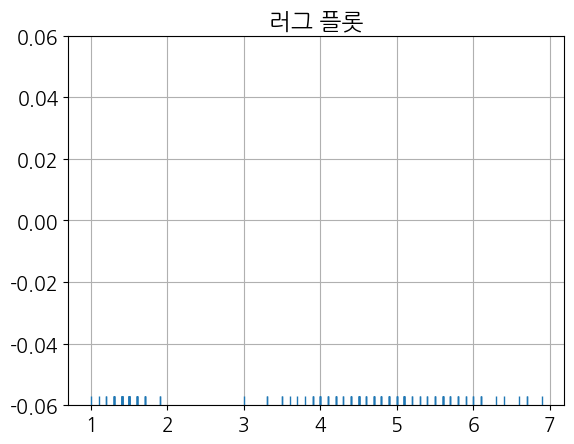

In [5]:
seaborn.rugplot(data)
plt.title('러그 플롯')
plt.grid(True)
plt.show()

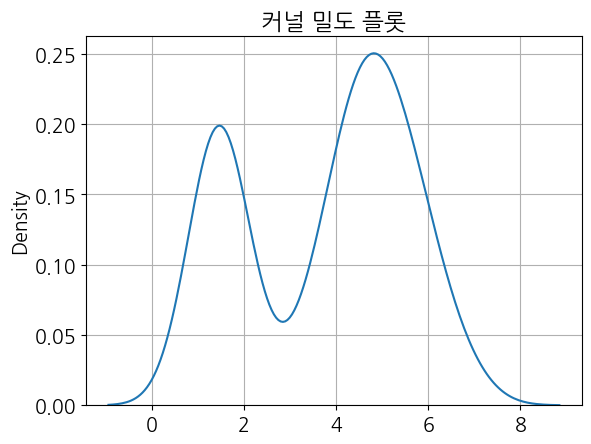

In [6]:
seaborn.kdeplot(data)
plt.title('커널 밀도 플롯')
plt.grid(True)
plt.show()

#### 카운트 플롯
seaborn 패키지의 `countplot()` 메서드로 각 카테고리 별 사이즈를 표시할 수 있음  
`countplot()` 메서드는 데이터프레임만 사용 가능
`countplot(x='컬럼명', data=데이터프레임)`

In [ ]:
titanic

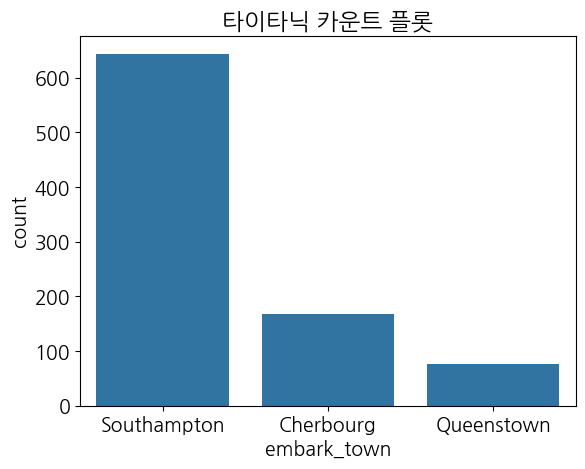

In [8]:
seaborn.countplot(x='embark_town', data=titanic)
plt.title('타이타닉 카운트 플롯')
plt.show()

In [9]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


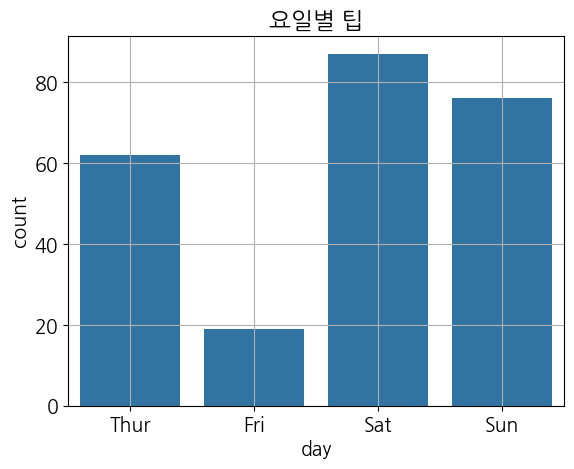

In [10]:
seaborn.countplot(x='day', data=tips)
plt.title('요일별 팁')
plt.grid(True)
plt.show()

### seaborn을 활용한 다차원 데이터
다차원 데이터는 3가지의 경우의 수를 가질 수 있음
  
- 모든 데이터가 실수형
- 모든 데이터가 카테고리형
- 데이터가 실수형과 카테고리형이 섞여 있음

#### 2차원 실수형 데이터
데이터가 2차원이면서 모두 실수이면 `jointplot()` 메서드를 사용하여 표현 할 수 있음  
`jointplot()`: 스캐터 플롯, 등고선 플롯 등을 나타낼 수 있고 양측에 히스토그램을 표현해 줌 (데이터프레임만 사용 가능)

In [11]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


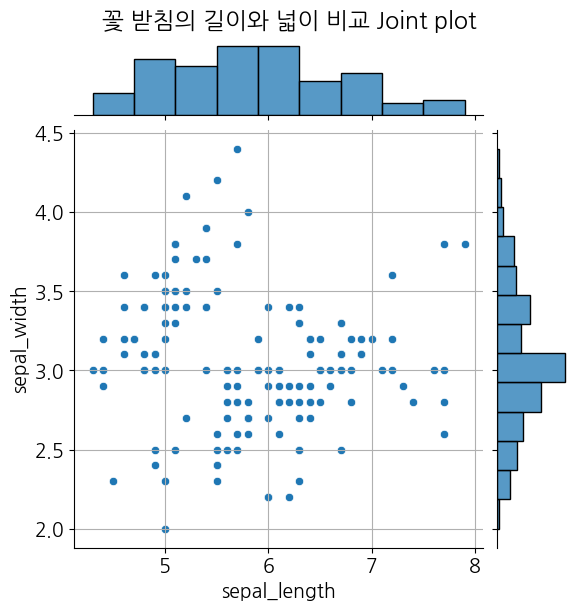

In [12]:
seaborn.jointplot(data=iris, x='sepal_length', y='sepal_width', kind='scatter')
plt.suptitle('꽃 받침의 길이와 넓이 비교 Joint plot', y=1.02)
plt.grid(True)
plt.show()

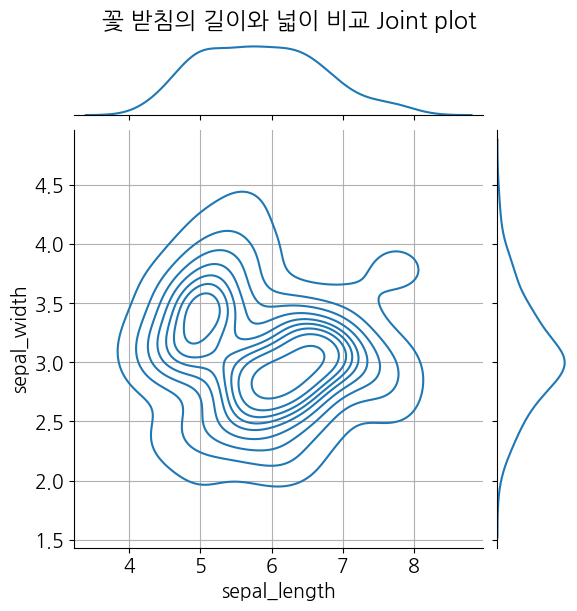

In [13]:
seaborn.jointplot(data=iris, x='sepal_length', y='sepal_width', kind='kde')
plt.suptitle('꽃 받침의 길이와 넓이 비교 Joint plot', y=1.02)
plt.grid(True)
plt.show()

### 다차원 실수형 데이터
3차원 이상의 데이터라면 `pairplot()` 메서드로 그리드 형태의 스캐터 플롯의 행렬을 만들어 줌  
같은 데이터가 만나는 대각선에는 각 데이터의 히스토그램을 표현

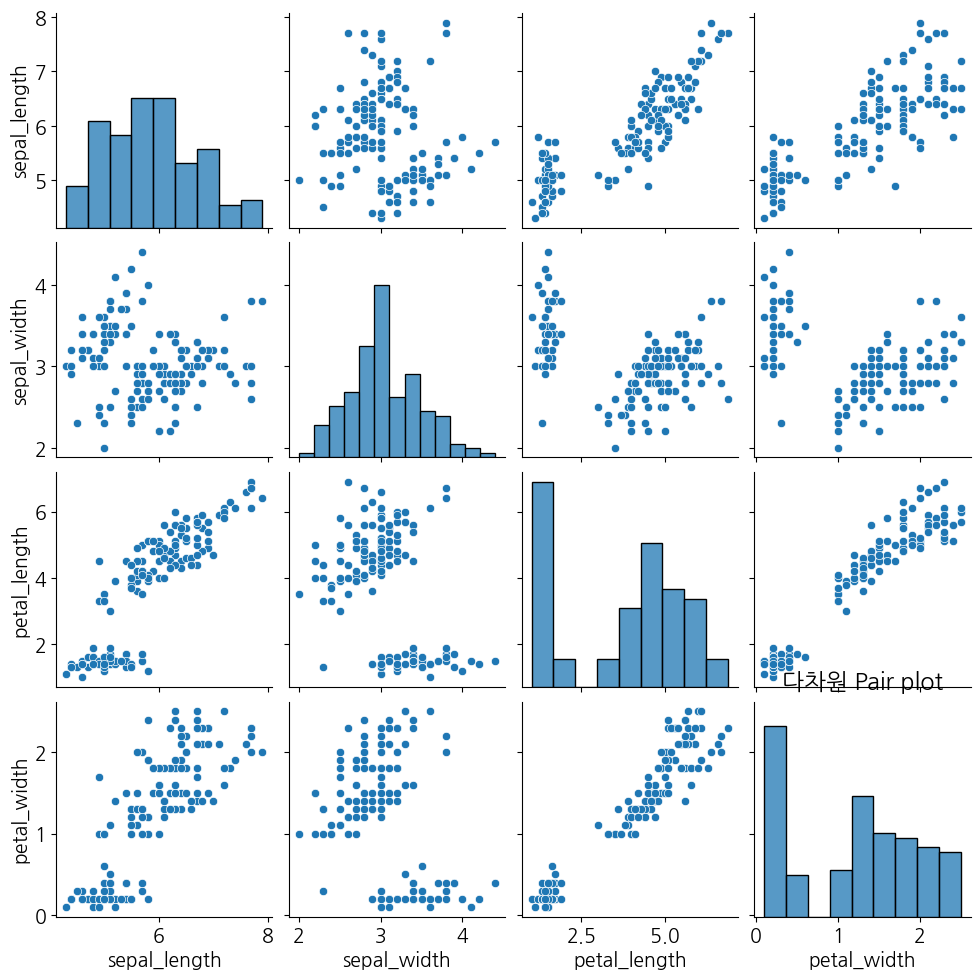

In [15]:
seaborn.pairplot(iris)
plt.suptitle('다차원 Pair plot', y=1.02)
plt.show()

카테고리형 데이터가 포함되어 있는 경우라면 `hue` 인수에 카테고리 변수 이름을 지정함

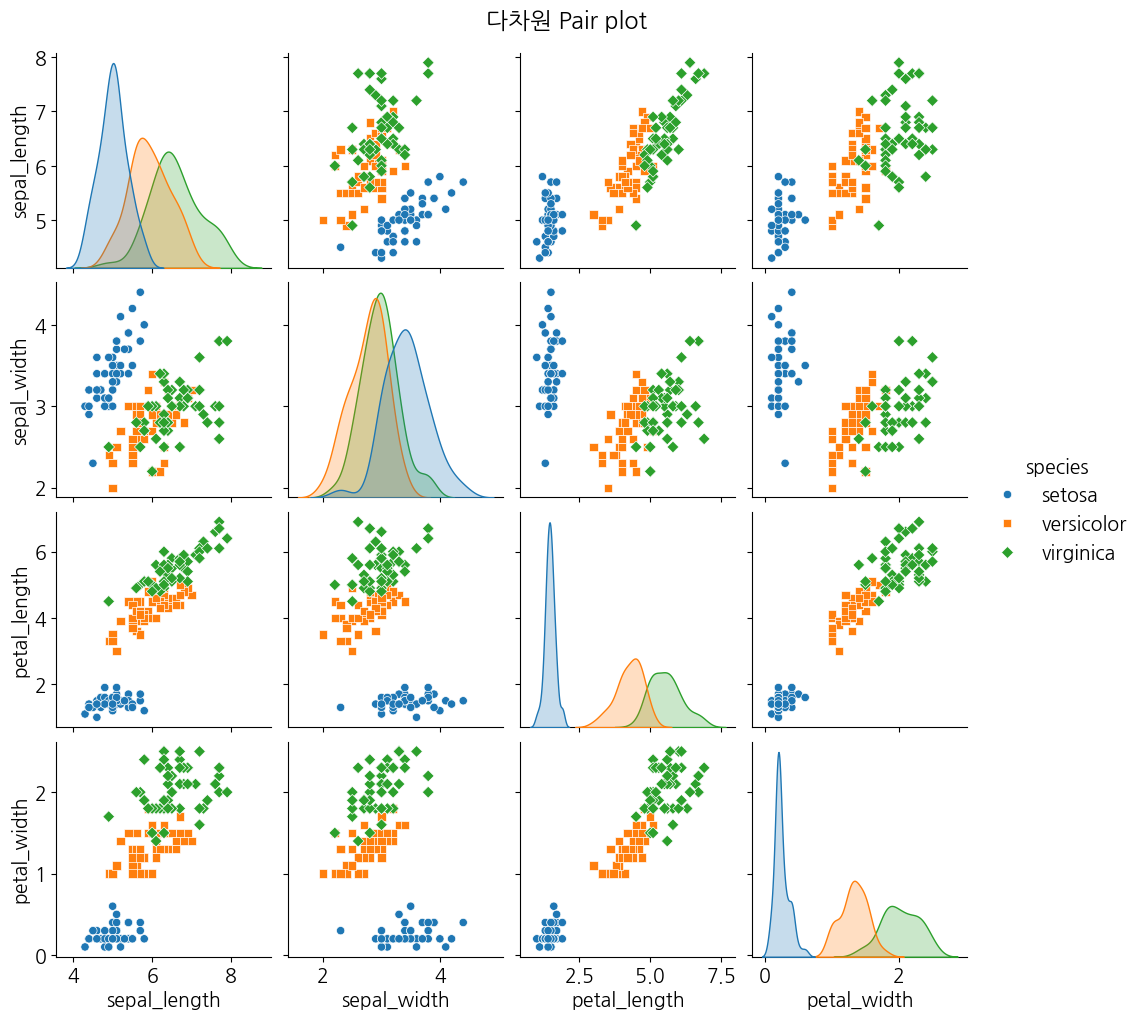

In [16]:
seaborn.pairplot(iris, hue='species', markers=['o', 's', 'D'])
plt.suptitle('다차원 Pair plot', y=1.02)
plt.show()

#### 2차원 카테고리 데이터
데이터가 2차원이면서 모두 카테고리 값이면 `heatmap()` 메서드로 히트맵을 표현할 수 있음

In [5]:
titanic_size = titanic.pivot_table(
    index="class", columns="sex", aggfunc="size")
titanic_size

C:\Users\ITPS\AppData\Local\Temp\ipykernel_6524\4072891046.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanic_size = titanic.pivot_table(


sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


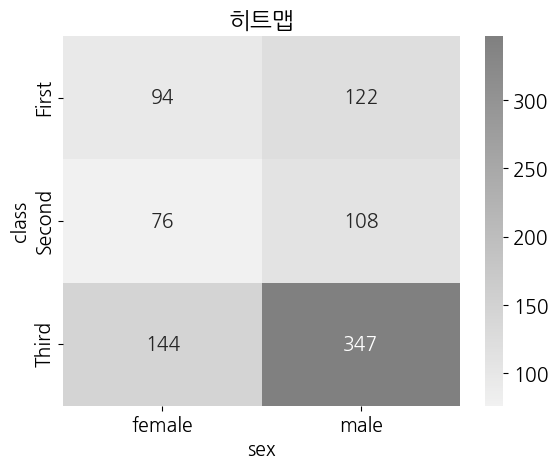

In [6]:
seaborn.heatmap(titanic_size, cmap=seaborn.light_palette("gray", as_cmap=True), annot=True, fmt="d")
plt.title("히트맵")
plt.show()

#### 2차원 복합 데이터
데이터가 2차원이면서 실수 값과 카테고리 값이 섞여 있다면 기존 플롯 외의 다른 플롯을 사용할 수 있음

`barplot()`: 카테고리 값에 따른 실수 값의 평균과 표준 편차를 바 형태로 표시  
평균은 막대 그래프로, 편차는 에러바로 표현

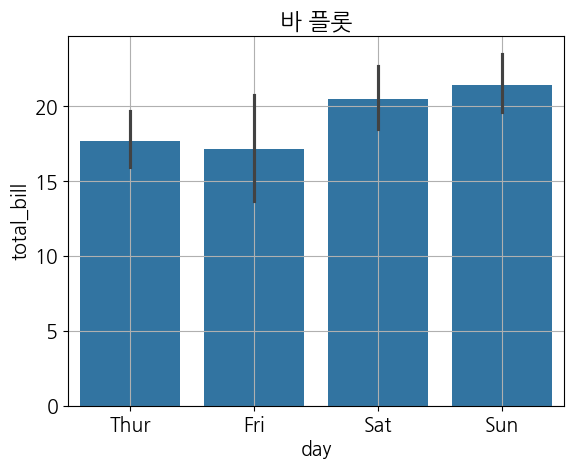

In [7]:
seaborn.barplot(data=tips, x='day', y='total_bill')
plt.title('바 플롯')
plt.grid(True)
plt.show()

`boxplot()`: 사분위수와 아웃라이어라는 데이터를 표현하는 방법

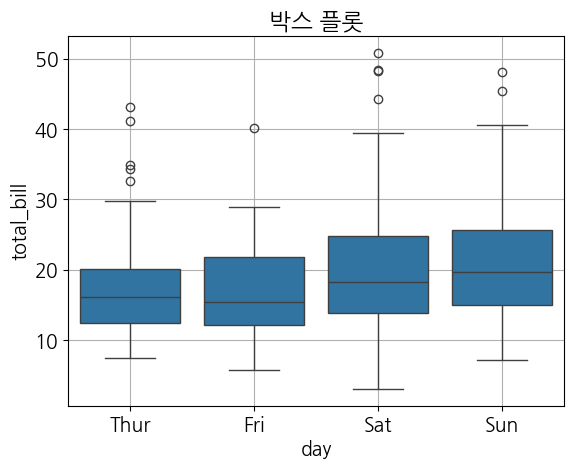

In [8]:
seaborn.boxplot(data=tips, x='day', y='total_bill')
plt.title('박스 플롯')
plt.grid(True)
plt.show()

`violinplot()`: 세로 방향으로 커널 밀도 히스토그램을 그려줌

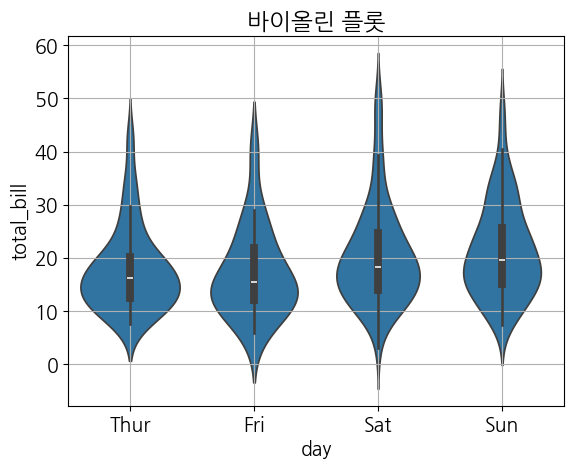

In [9]:
seaborn.violinplot(data=tips, x='day', y='total_bill')
plt.title('바이올린 플롯')
plt.grid(True)
plt.show()

`stripplot()`: 모든 데이터를 점으로 표시해서 보여줌

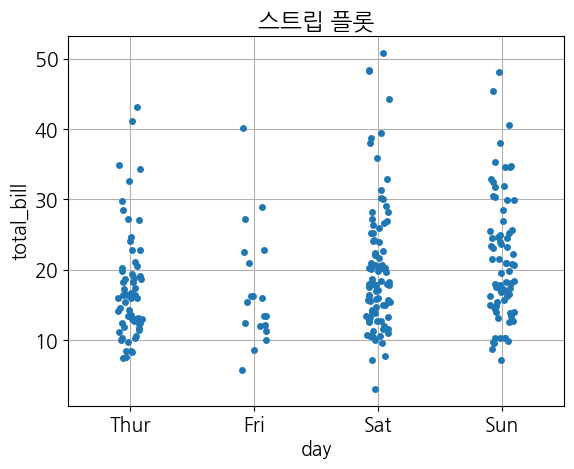

In [10]:
seaborn.stripplot(data=tips, x='day', y='total_bill')
plt.title('스트립 플롯')
plt.grid(True)
plt.show()

`swarmplot()`: 스트립 플롯에서 데이터가 겹치는 부분을 겹치지 않게 표현

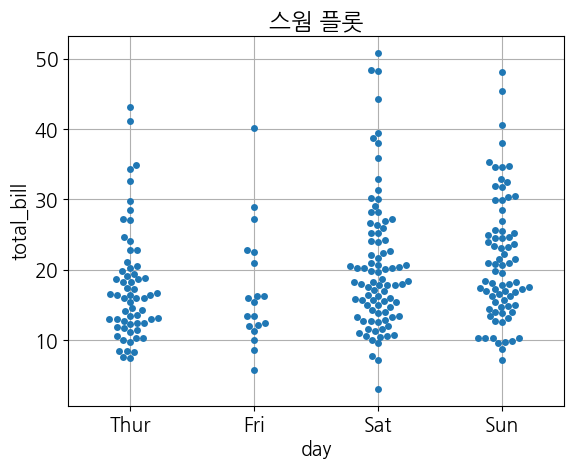

In [11]:
seaborn.swarmplot(data=tips, x='day', y='total_bill')
plt.title('스웜 플롯')
plt.grid(True)
plt.show()

### seaborn을 활용한 다차원 복합 데이터
seaborn 에서 제공해주는 플롯 메서드들은 `hue` 인수로 카테고리 값을 추가로 지정할 수 있음

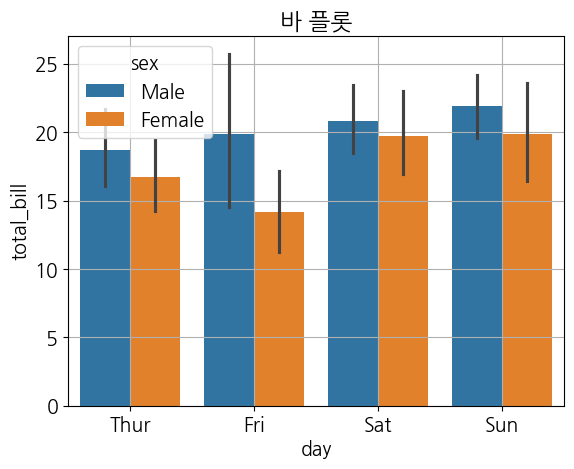

In [13]:
seaborn.barplot(data=tips, x='day', y='total_bill', hue='sex')
plt.title('바 플롯')
plt.grid(True)
plt.show()

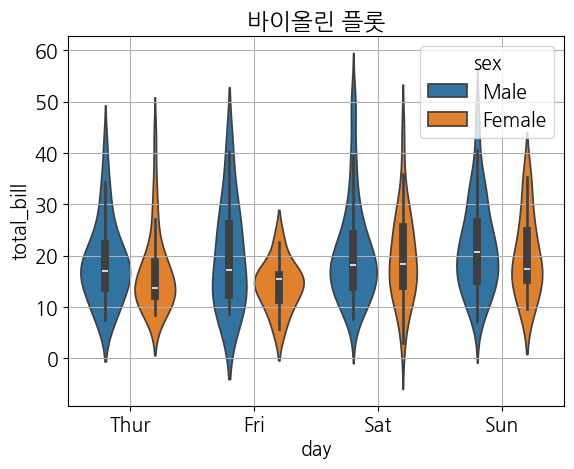

In [14]:
seaborn.violinplot(data=tips, x='day', y='total_bill', hue='sex')
plt.title('바이올린 플롯')
plt.grid(True)
plt.show()

`stipplot()`, `swarmplot()`, `violinplot()`은 `split`, `dodge` 인수로 시각화 방법을 변경할 수 있음

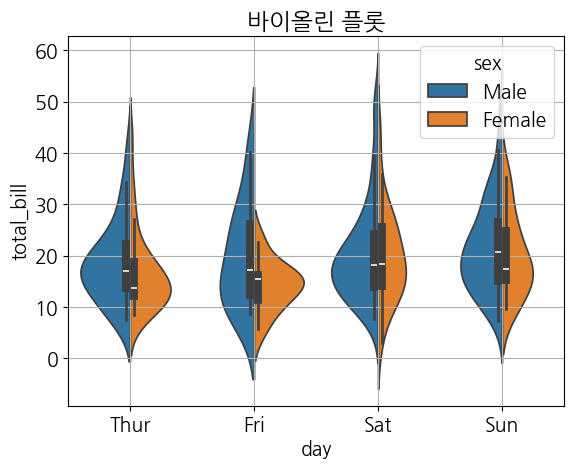

In [15]:
seaborn.violinplot(data=tips, x='day', y='total_bill', hue='sex', split=True)
plt.title('바이올린 플롯')
plt.grid(True)
plt.show()

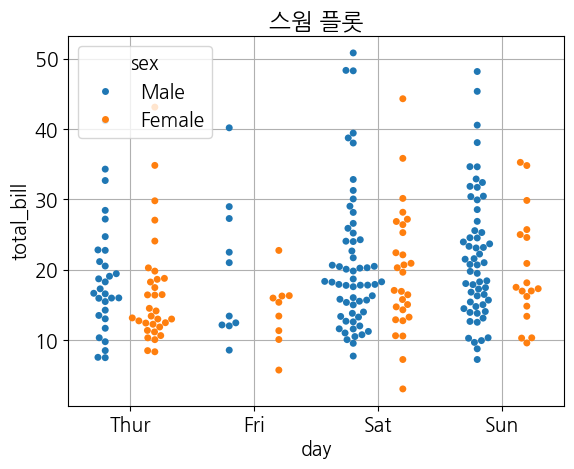

In [16]:
seaborn.swarmplot(data=tips, x='day', y='total_bill', hue='sex', dodge=True)
plt.title('스웜 플롯')
plt.grid(True)
plt.show()

`heatmap` 으로도 두 개의 카테고리 값에 의한 실수값 변화를 볼 수 있음

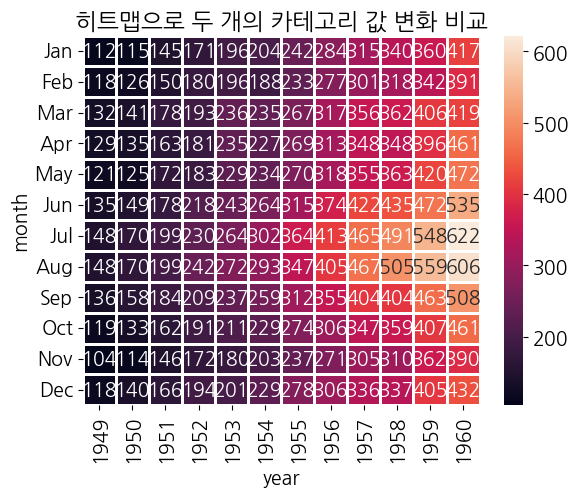

In [17]:
passengers = flights.pivot(index='month', columns='year', values='passengers')
plt.title('히트맵으로 두 개의 카테고리 값 변화 비교')
seaborn.heatmap(passengers, annot=True, fmt='d', linewidths=1)
plt.show()

### seaborn을 활용한 catplot
색상과 행을 사용해서 3개 이상의 카테고리 값의 분포를 표현

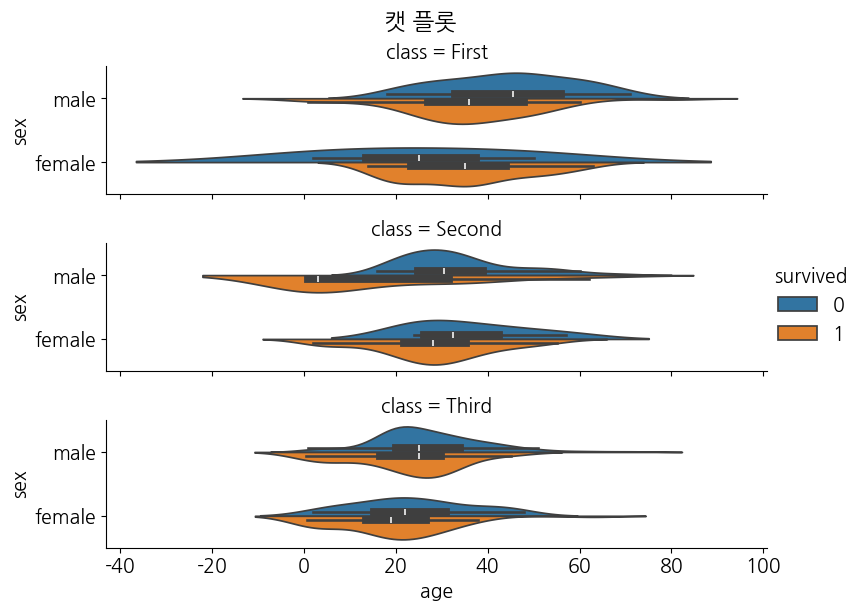

In [18]:
data= titanic[titanic.survived.notnull()]

seaborn.catplot(data=data, x='age', y='sex', hue='survived', row='class', kind='violin', split=True, height=2, aspect=4)
plt.suptitle('캣 플롯', y=1.02)

plt.show()

### seaborn을 활용한 차트 겹치기
시각적 효과를 높이기 위해 여러 종류의 차트를 겹쳐서 표기 가능

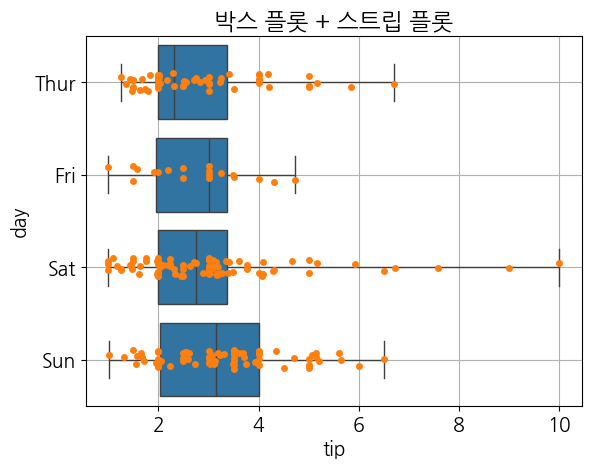

In [5]:
plt.title('박스 플롯 + 스트립 플롯')
seaborn.boxplot(data=tips, x='tip', y='day', whis=np.inf)
seaborn.stripplot(data=tips, x='tip', y='day')
plt.grid(True)
plt.show()

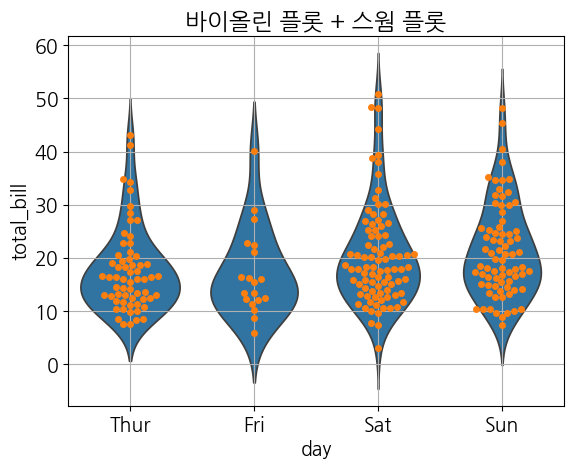

In [11]:
plt.title('바이올린 플롯 + 스웜 플롯')
seaborn.violinplot(data=tips, x='day', y='total_bill', inner=None)
seaborn.swarmplot(data=tips, x='day', y='total_bill')
plt.grid(True)
plt.show()

### seaborn을 활용한 스타일 변경
seaborn 패키지는 matplotlib에서 제공하는 기본 스타일이 아닌 특정 스타일로 변경할 수 있도록 함  
`set()` 메서드로 색상, 틱 스타일 등을 변경할 수 있음  
`set_style()` 메서드로 틱 스타일 변경할 수 있음

In [14]:
def sinplot(flip=1):
    x = np.linspace(0,14,100)
    for number in range(1,7):
        plt.plot(x, np.sin(x+ number*0.5) * (7- number) * flip)

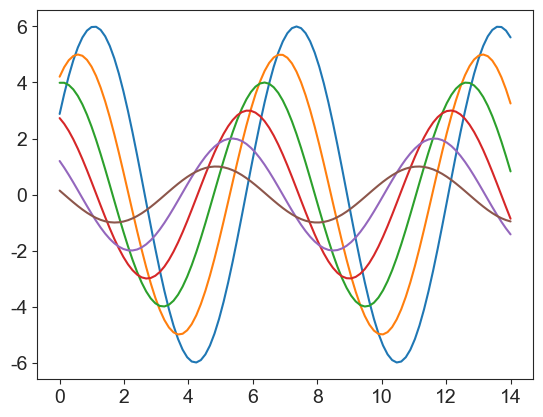

In [19]:
seaborn.set_style('ticks')
sinplot()

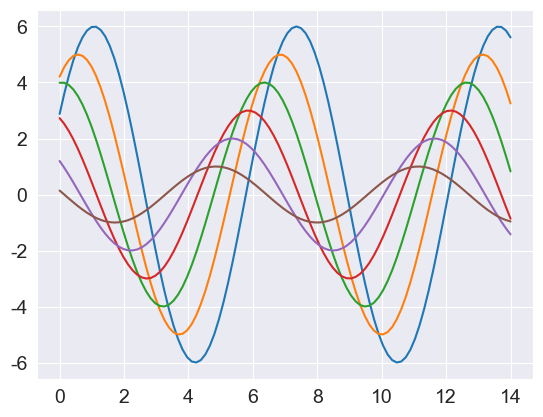

In [20]:
seaborn.set_style('darkgrid')
sinplot()

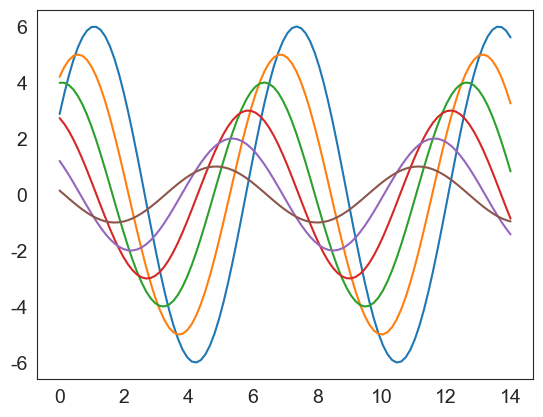

In [25]:
seaborn.set_style('white')
sinplot()

### pandas 패키지의 시각화 기능
pandas 패키지의 series, dataframe 객체는 자체적으로 plot 메서드를 이용해서 시각화를 할 수 있음  
`plot()` 메서드의 `kind` 인수로 표현할 플롯을 지정할 수 있음  
또는 plot 속성의 각 차트 메서드로 바로 특정 플롯으로 표현할 수 있음

In [23]:
df = pd.DataFrame(np.random.randn(100,3), 
                 index= pd.date_range('2024-03-05', periods=100),
                 columns=['A', 'B', 'C']).cumsum()
df

,A,B,C
2024-03-05,-1.189211,0.679317,0.757057
2024-03-06,-2.006520,0.837815,1.440581
2024-03-07,-3.027600,1.618290,1.933636
2024-03-08,-2.694009,2.144916,2.430398
2024-03-09,-2.276414,0.685184,0.292275
...,...,...,...
2024-06-08,-10.257494,9.106097,-3.781844
2024-06-09,-10.335687,10.277048,-5.525538
2024-06-10,-9.140473,12.862854,-4.710685
2024-06-11,-8.281961,14.163978,-3.337679


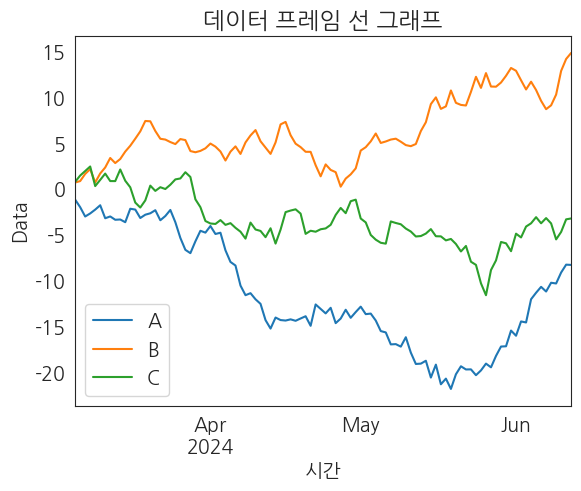

In [29]:
df.plot()
plt.title('데이터 프레임 선 그래프')
plt.xlabel('시간')
plt.ylabel('Data')
plt.show()

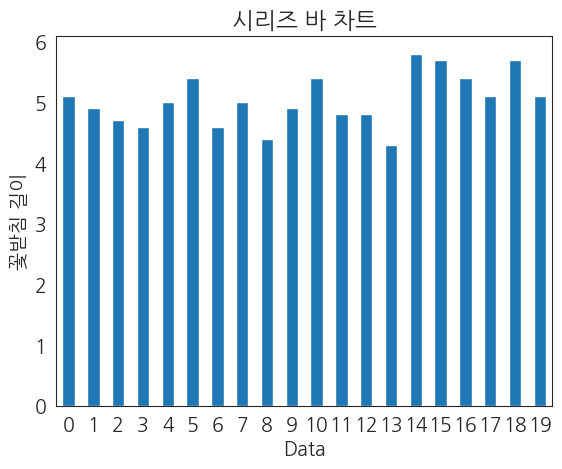

In [32]:
data = iris.sepal_length[:20]
data.plot.bar(rot=0)
plt.title('시리즈 바 차트')
plt.xlabel('Data')
plt.ylabel('꽃받침 길이')
plt.show()

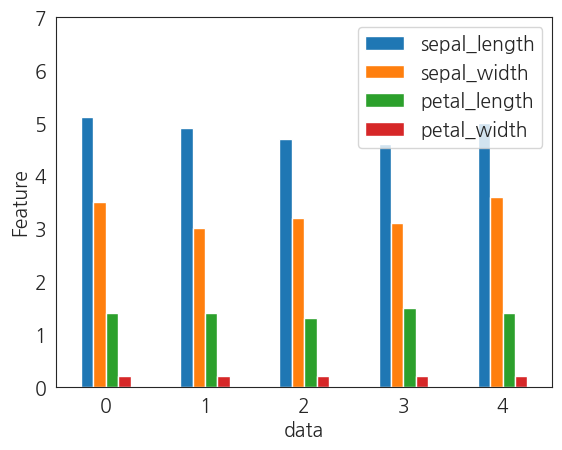

In [33]:
data = iris[:5]
data.plot.bar(rot=0)
plt.xlabel('data')
plt.ylabel('Feature')
plt.ylim(0,7)
plt.show()

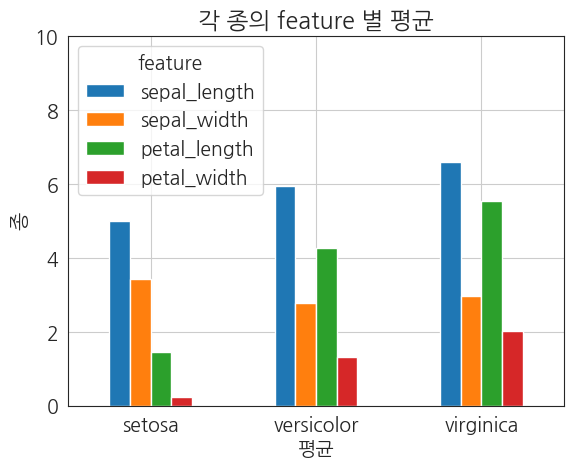

In [37]:
data = iris.groupby(iris.species).mean()
data.columns.name = 'feature'
data.plot.bar(rot=0)
plt.title('각 종의 feature 별 평균')
plt.xlabel('평균')
plt.ylabel('종')
plt.ylim(0,10)
plt.grid(True)
plt.show()

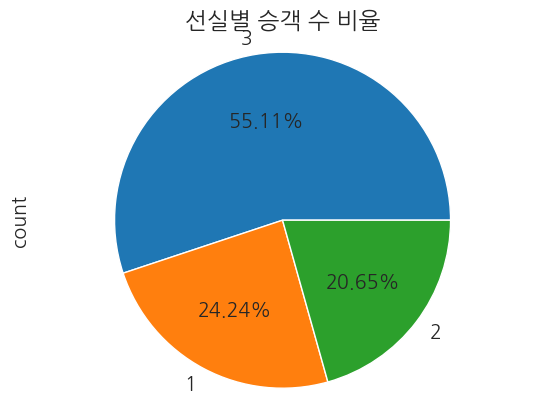

In [43]:
data = titanic.pclass.value_counts()
data.plot.pie(autopct='%.2f%%')
plt.title('선실별 승객 수 비율')
plt.axis('equal')
plt.grid(True)
plt.show()

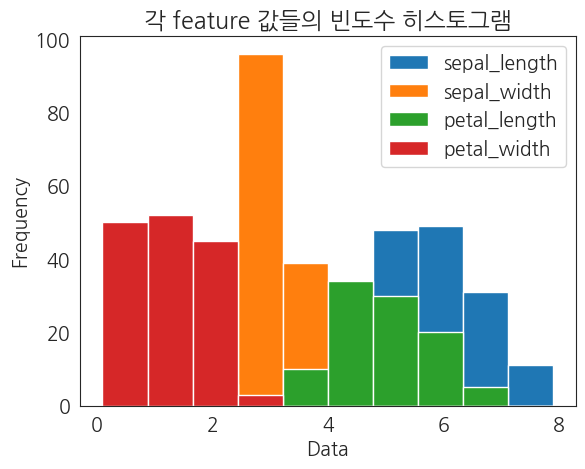

In [44]:
iris.plot.hist()
plt.title('각 feature 값들의 빈도수 히스토그램')
plt.xlabel('Data')
plt.show()

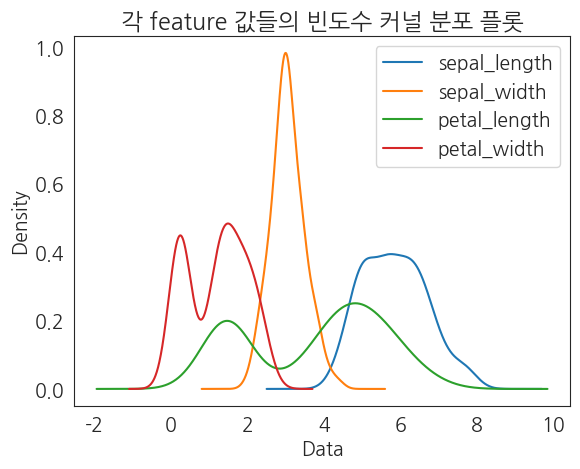

In [45]:
iris.plot.kde()
plt.title('각 feature 값들의 빈도수 커널 분포 플롯')
plt.xlabel('Data')
plt.show()

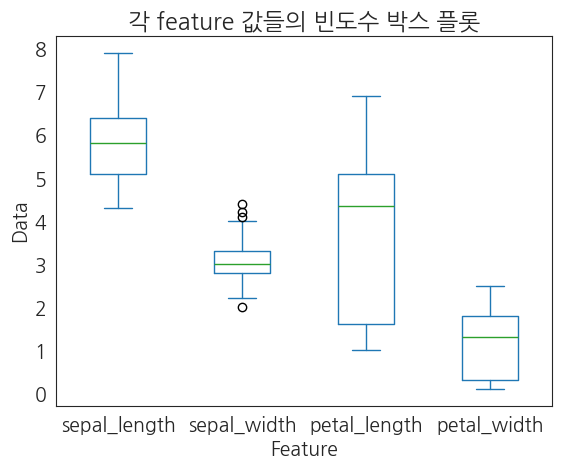

In [46]:
iris.plot.box()
plt.title('각 feature 값들의 빈도수 박스 플롯')
plt.xlabel('Feature')
plt.ylabel('Data')
plt.show()

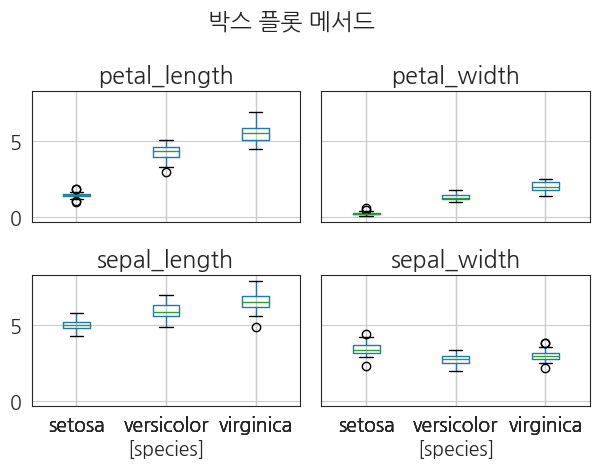

In [47]:
iris.boxplot(by='species')
plt.tight_layout()
plt.suptitle('박스 플롯 메서드')
plt.show()